In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats as stm
import random
import os
%matplotlib inline
import plotly.express as px

In [2]:
app_df= pd.read_csv(r'D:\Internship from Evos\Major Project\application_data_new.csv',encoding = 'latin')
app_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,1,Cash loans,M,202500,406598,24701.0,351000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers
1,100003,0,Cash loans,F,270000,1293503,35699.0,1129500.0,State servant,Higher education,Married,House or apartment,Core staff
2,100004,0,Revolving loans,M,67500,135000,6750.0,135000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers
3,100006,0,Cash loans,F,135000,312683,29687.0,297000.0,Working,Secondary or secondary special,Civil marriage,House or apartment,Laborers
4,100007,0,Cash loans,M,121500,513000,21866.0,513000.0,Working,Secondary or secondary special,Single,House or apartment,Core staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276475,456230,0,Cash loans,F,292500,355536,18284.0,270000.0,Commercial associate,Higher education,Civil marriage,House or apartment,No Occupation
276476,456231,0,Cash loans,M,117000,1071909,31473.0,936000.0,Pensioner,Secondary or secondary special,Married,House or apartment,No Occupation
276477,456244,0,Cash loans,F,261000,1303812,35982.0,1138500.0,Working,Higher education,Married,House or apartment,No Occupation
276478,456249,0,Cash loans,F,112500,225000,22050.0,225000.0,Pensioner,Secondary or secondary special,Single,House or apartment,No Occupation


In [3]:
prev_df= pd.read_csv(r'D:\Internship from Evos\Major Project\previous_application_new.csv',encoding = 'latin')
prev_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS
0,2030495,271877,Consumer loans,1730,17145,17145,0,17145,Approved
1,2802425,108129,Cash loans,25189,607500,679671,0,607500,Approved
2,2523466,122040,Cash loans,15061,112500,136445,0,112500,Approved
3,2819243,176158,Cash loans,47041,450000,470790,0,450000,Approved
4,1784265,202054,Cash loans,31924,337500,404055,0,337500,Refused
...,...,...,...,...,...,...,...,...,...
664061,2513664,340111,Consumer loans,10477,98042,96971,9806,98042,Approved
664062,2230795,255000,Consumer loans,50978,210960,189864,21096,210960,Refused
664063,1730537,429268,Consumer loans,5793,38070,36527,3807,38070,Approved
664064,2100360,389043,Consumer loans,4775,35357,30110,7110,35357,Approved


In [4]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276480 entries, 0 to 276479
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           276480 non-null  int64  
 1   TARGET               276480 non-null  int64  
 2   NAME_CONTRACT_TYPE   276480 non-null  object 
 3   CODE_GENDER          276480 non-null  object 
 4   AMT_INCOME_TOTAL     276480 non-null  int64  
 5   AMT_CREDIT           276480 non-null  int64  
 6   AMT_ANNUITY          276468 non-null  float64
 7   AMT_GOODS_PRICE      276231 non-null  float64
 8   NAME_INCOME_TYPE     276480 non-null  object 
 9   NAME_EDUCATION_TYPE  276480 non-null  object 
 10  NAME_FAMILY_STATUS   276480 non-null  object 
 11  NAME_HOUSING_TYPE    276480 non-null  object 
 12  OCCUPATION_TYPE      276480 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 27.4+ MB


In [5]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664066 entries, 0 to 664065
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   SK_ID_PREV            664066 non-null  int64 
 1   SK_ID_CURR            664066 non-null  int64 
 2   NAME_CONTRACT_TYPE    664066 non-null  object
 3   AMT_ANNUITY           664066 non-null  int64 
 4   AMT_APPLICATION       664066 non-null  int64 
 5   AMT_CREDIT            664066 non-null  int64 
 6   AMT_DOWN_PAYMENT      664066 non-null  int64 
 7   AMT_GOODS_PRICE       664066 non-null  int64 
 8   NAME_CONTRACT_STATUS  664066 non-null  object
dtypes: int64(7), object(2)
memory usage: 45.6+ MB


In [6]:
app_df.isnull().sum()

SK_ID_CURR               0
TARGET                   0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             12
AMT_GOODS_PRICE        249
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
OCCUPATION_TYPE          0
dtype: int64

In [7]:
app_df['AMT_ANNUITY']= app_df['AMT_ANNUITY'].fillna(app_df['AMT_ANNUITY'].median())
app_df['AMT_GOODS_PRICE']= app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].median())

In [8]:
app_df.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
OCCUPATION_TYPE        0
dtype: int64

In [9]:
prev_df.isnull().sum()

SK_ID_PREV              0
SK_ID_CURR              0
NAME_CONTRACT_TYPE      0
AMT_ANNUITY             0
AMT_APPLICATION         0
AMT_CREDIT              0
AMT_DOWN_PAYMENT        0
AMT_GOODS_PRICE         0
NAME_CONTRACT_STATUS    0
dtype: int64

In [10]:
app_df.duplicated().sum()

0

In [11]:
prev_df.duplicated().sum()

0

### Univariate Analysis

In [12]:
tar= app_df['TARGET'].value_counts()
print({1:'Defaulters',0:'Non-Defaulters'},'\n',tar)

{1: 'Defaulters', 0: 'Non-Defaulters'} 
 TARGET
0    254167
1     22313
Name: count, dtype: int64


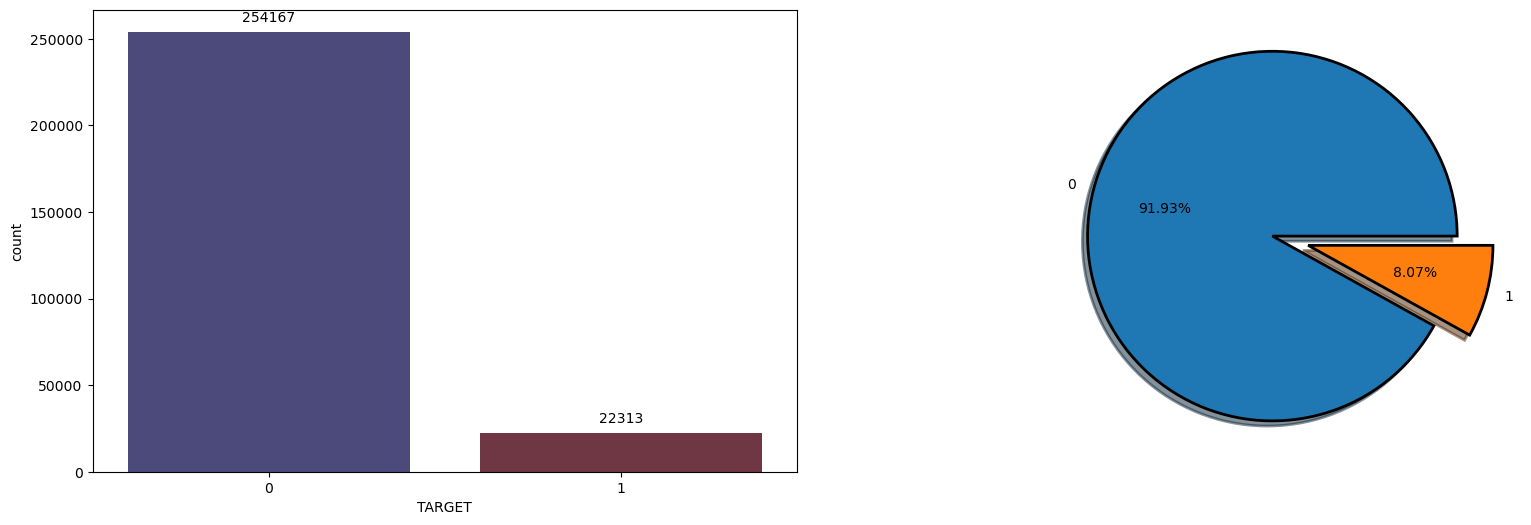

In [13]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='TARGET', data=app_df, hue='TARGET', legend=False, palette='icefire')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1)
plt.pie(app_df['TARGET'].value_counts(),labels= tar.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)

plt.show()

In [14]:
con= app_df['NAME_CONTRACT_TYPE'].value_counts()
print({'Cash loan','Revolving loan'},'\n',con)

{'Cash loan', 'Revolving loan'} 
 NAME_CONTRACT_TYPE
Cash loans         251870
Revolving loans     24610
Name: count, dtype: int64


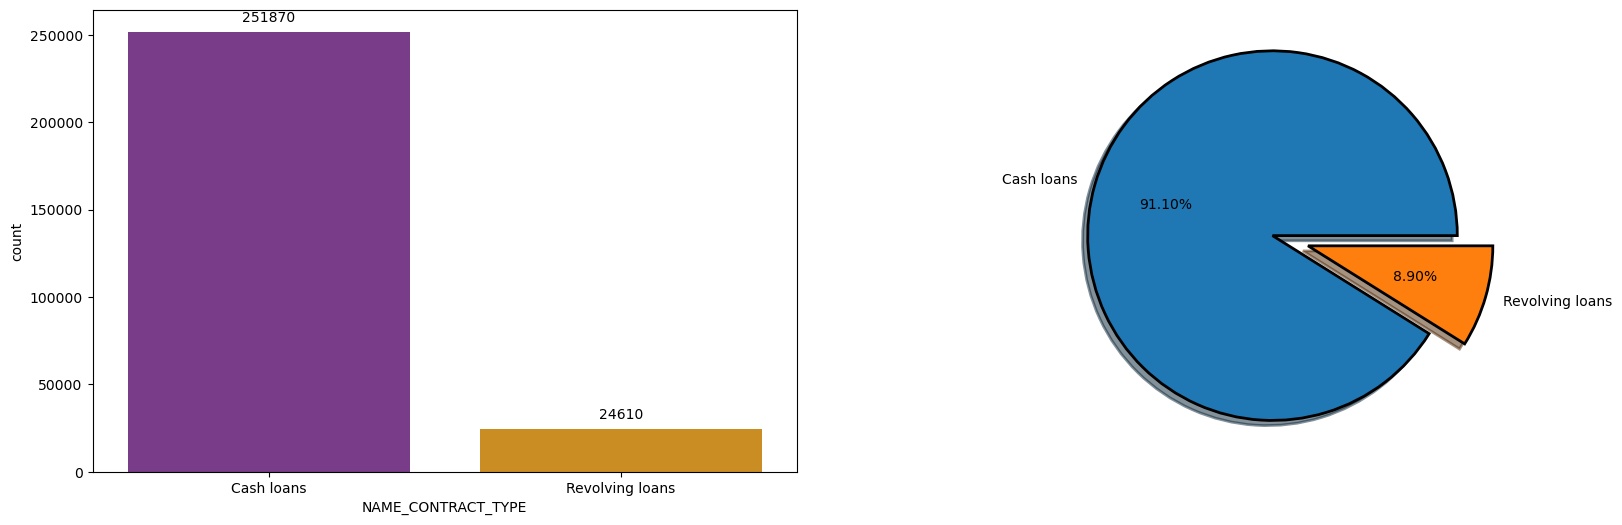

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='NAME_CONTRACT_TYPE', data=app_df, hue='NAME_CONTRACT_TYPE', legend=False, palette='CMRmap')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1)
plt.pie(app_df['NAME_CONTRACT_TYPE'].value_counts(),labels= con.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.show()

In [16]:
con1= prev_df['NAME_CONTRACT_TYPE'].value_counts()
print({'Cash loan','Revolving loan','Consumer loan'},'\n',con1)

{'Cash loan', 'Consumer loan', 'Revolving loan'} 
 NAME_CONTRACT_TYPE
Consumer loans     374610
Cash loans         244057
Revolving loans     45399
Name: count, dtype: int64


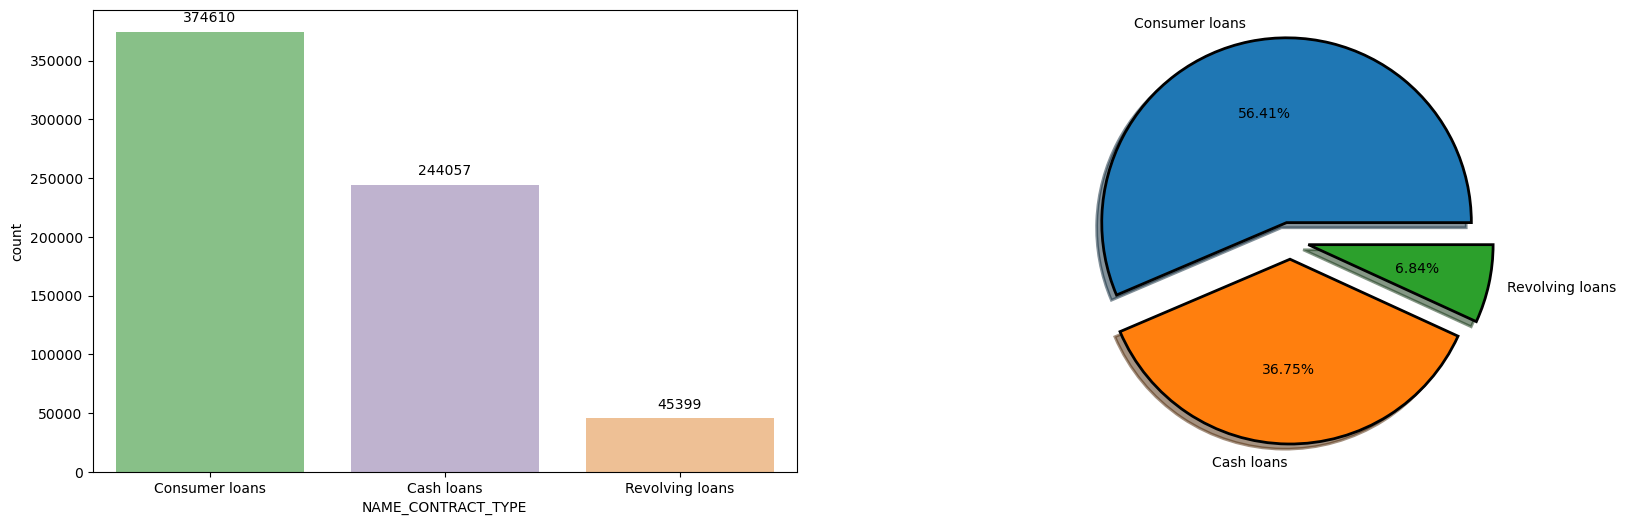

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='NAME_CONTRACT_TYPE', data=prev_df, hue='NAME_CONTRACT_TYPE', legend=False, palette='Accent')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1)
plt.pie(prev_df['NAME_CONTRACT_TYPE'].value_counts(),labels= con1.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.show()

In [18]:
gen= app_df['CODE_GENDER'].value_counts()
print({1:'M : Male',2:'F : Female',3:'XNA : Transgender'},'\n',gen)

{1: 'M : Male', 2: 'F : Female', 3: 'XNA : Transgender'} 
 CODE_GENDER
F      184190
M       92286
XNA         4
Name: count, dtype: int64


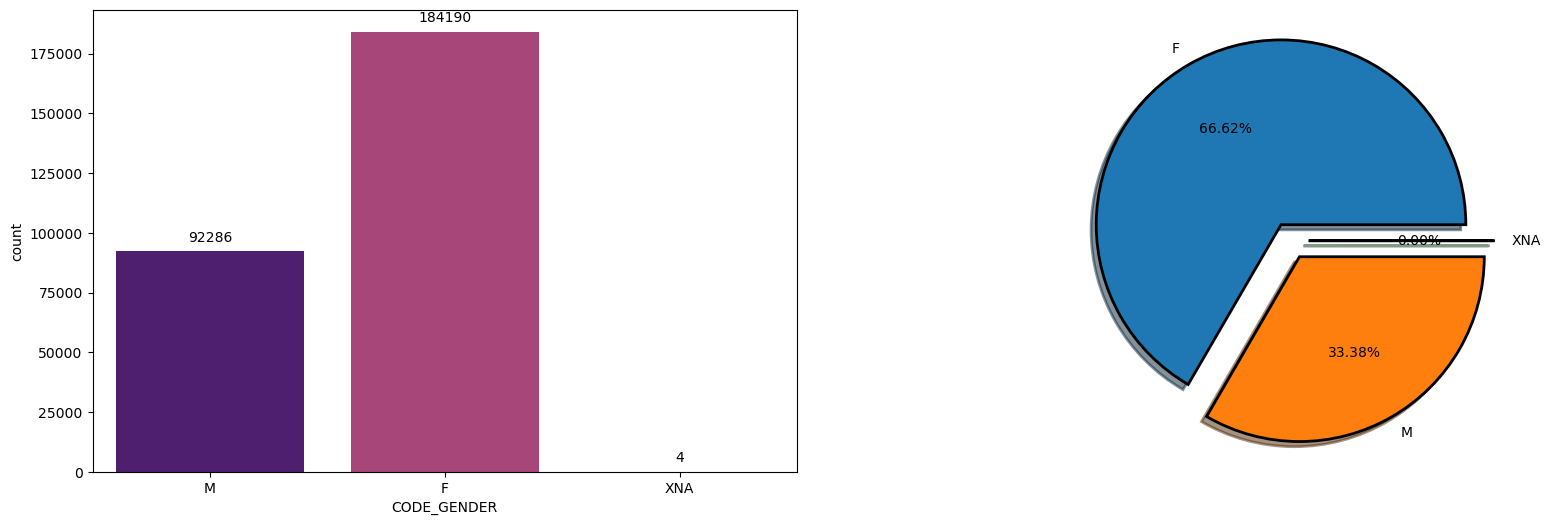

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='CODE_GENDER', data=app_df, hue='CODE_GENDER', legend=False, palette='magma')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1)
plt.pie(app_df['CODE_GENDER'].value_counts(),labels= gen.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.show()

In [20]:
inc= app_df['NAME_INCOME_TYPE'].value_counts()
print(inc)

NAME_INCOME_TYPE
Working                 140679
Commercial associate     61350
Pensioner                55362
State servant            19050
Unemployed                  22
Student                     12
Maternity leave              3
Businessman                  2
Name: count, dtype: int64


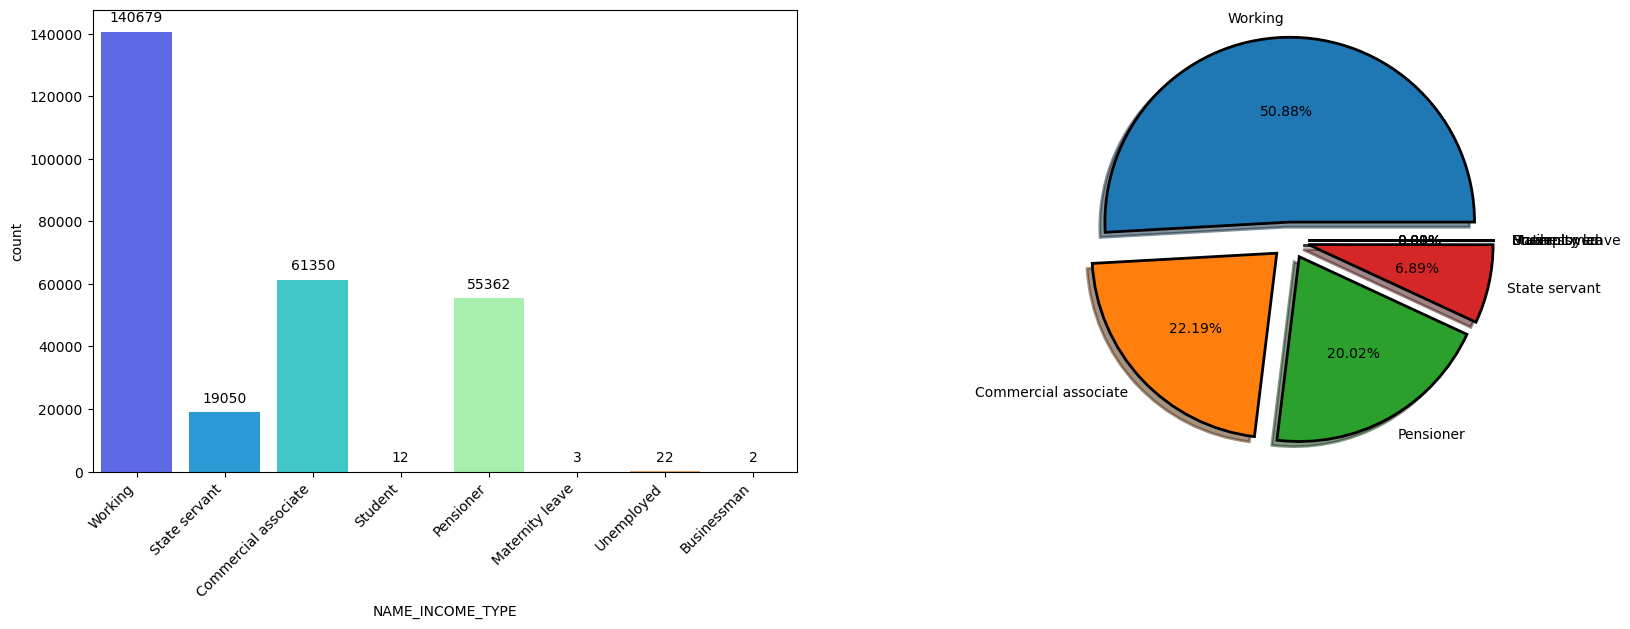

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='NAME_INCOME_TYPE', data=app_df, hue='NAME_INCOME_TYPE', legend=False, palette='rainbow')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(app_df['NAME_INCOME_TYPE'].value_counts(),labels= inc.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
edu= app_df['NAME_EDUCATION_TYPE'].value_counts()
print(edu)

NAME_EDUCATION_TYPE
Secondary or secondary special    199133
Higher education                   64641
Incomplete higher                   9012
Lower secondary                     3540
Academic degree                      154
Name: count, dtype: int64


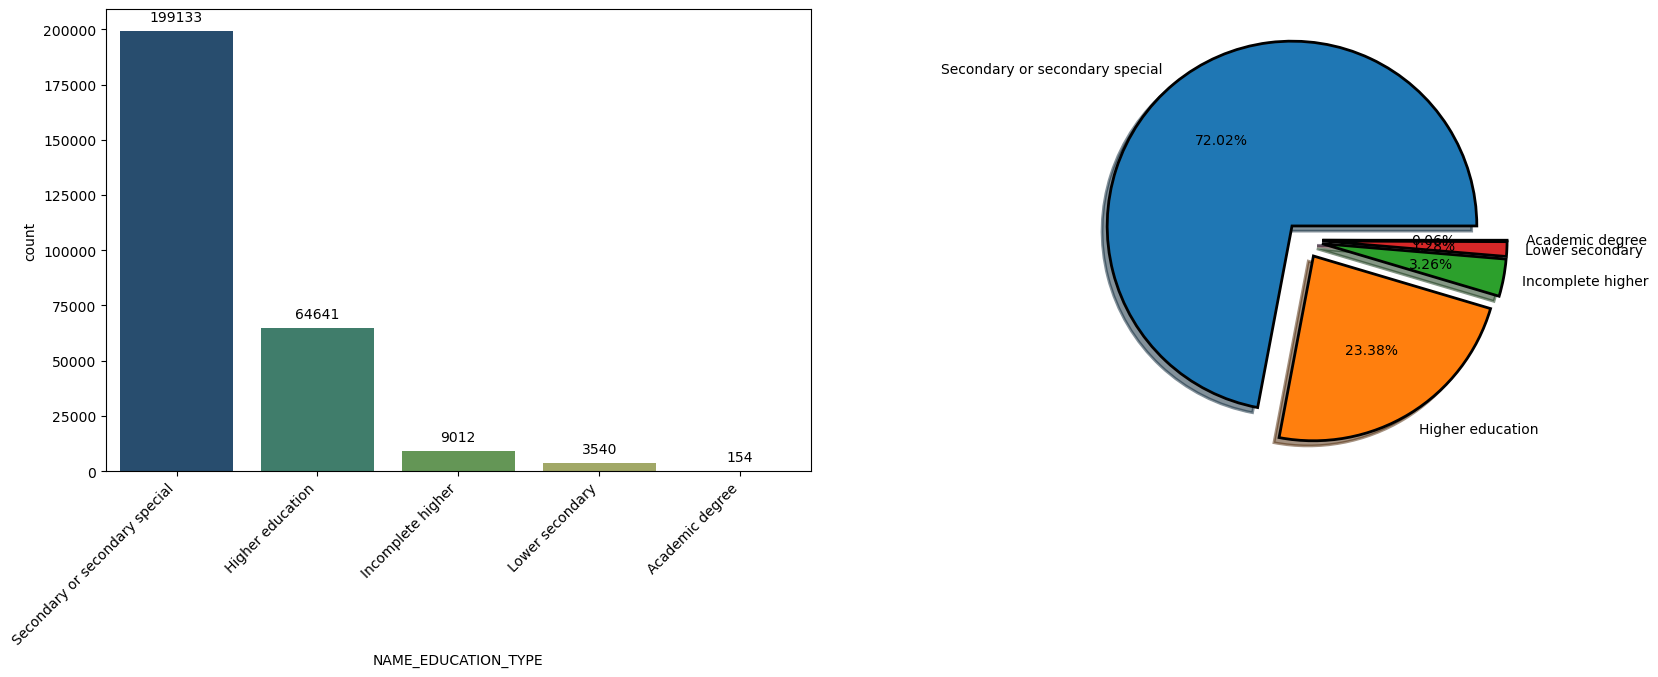

In [23]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='NAME_EDUCATION_TYPE', data=app_df, hue='NAME_EDUCATION_TYPE', legend=False, palette='gist_earth')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(app_df['NAME_EDUCATION_TYPE'].value_counts(),labels= edu.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
ms= app_df['NAME_FAMILY_STATUS'].value_counts()
print(ms)

NAME_FAMILY_STATUS
Married           176742
Single             39727
Civil marriage     26664
Separated          17931
Widow              15416
Name: count, dtype: int64


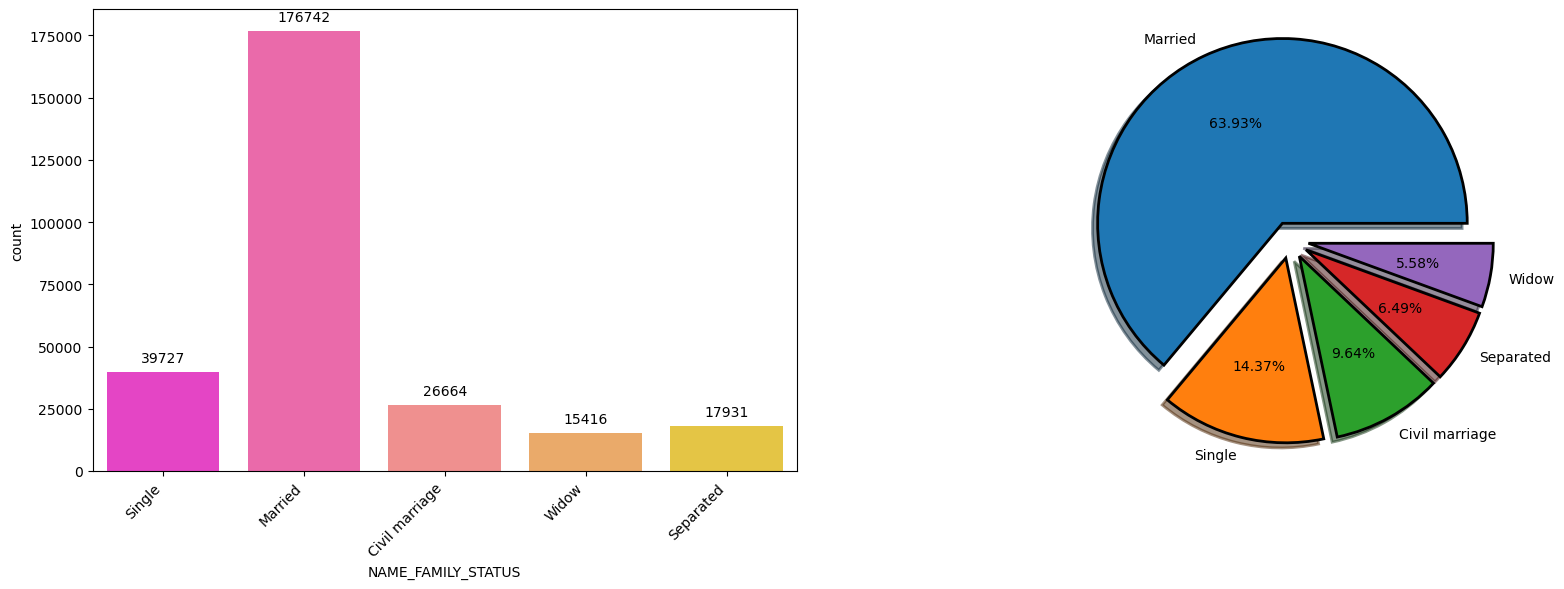

In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='NAME_FAMILY_STATUS', data=app_df, hue='NAME_FAMILY_STATUS', legend=False, palette='spring')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(app_df['NAME_FAMILY_STATUS'].value_counts(),labels= ms.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
hs= app_df['NAME_HOUSING_TYPE'].value_counts()
print(hs)

NAME_HOUSING_TYPE
House or apartment     245693
With parents            12978
Municipal apartment     10200
Rented apartment         4269
Office apartment         2334
Co-op apartment          1006
Name: count, dtype: int64


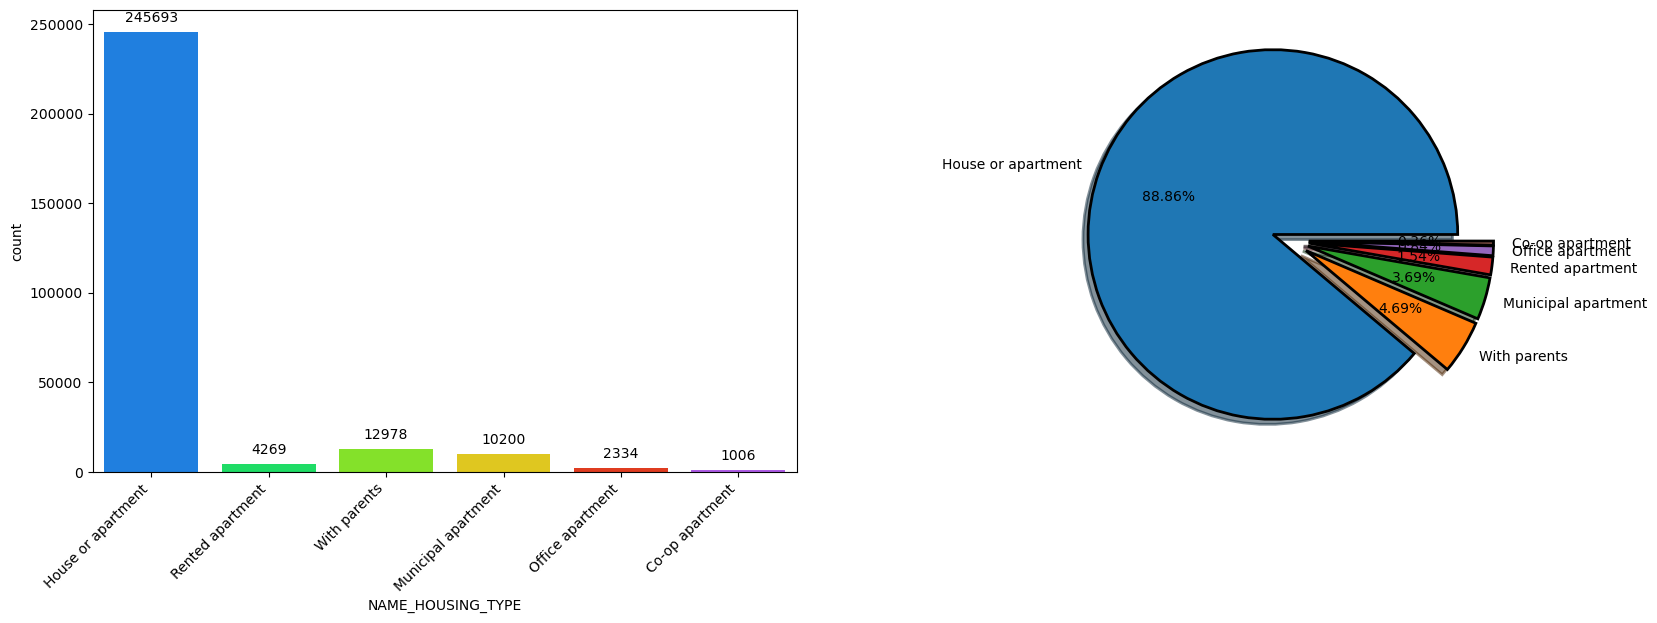

In [27]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='NAME_HOUSING_TYPE', data=app_df, hue='NAME_HOUSING_TYPE', legend=False, palette='gist_ncar')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.xticks(rotation=45, ha='right')


plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(app_df['NAME_HOUSING_TYPE'].value_counts(),labels= hs.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
os= app_df['OCCUPATION_TYPE'].value_counts()
print(os)

OCCUPATION_TYPE
No Occupation            96391
Laborers                 47675
Sales staff              27648
Core staff               22905
Managers                 17713
Drivers                  15971
High skill tech staff     9377
Accountants               8192
Medicine staff            7442
Security staff            5865
Cooking staff             5236
Cleaning staff            4128
Private service staff     2286
Low-skill Laborers        1822
Waiters/barmen staff      1175
Secretaries               1126
Realty agents              664
HR staff                   468
IT staff                   396
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Drivers'),
  Text(4, 0, 'Sales staff'),
  Text(5, 0, 'Cleaning staff'),
  Text(6, 0, 'Private service staff'),
  Text(7, 0, 'Managers'),
  Text(8, 0, 'Medicine staff'),
  Text(9, 0, 'Cooking staff'),
  Text(10, 0, 'High skill tech staff'),
  Text(11, 0, 'Low-skill Laborers'),
  Text(12, 0, 'Security staff'),
  Text(13, 0, 'Realty agents'),
  Text(14, 0, 'Secretaries'),
  Text(15, 0, 'Waiters/barmen staff'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff'),
  Text(18, 0, 'No Occupation')])

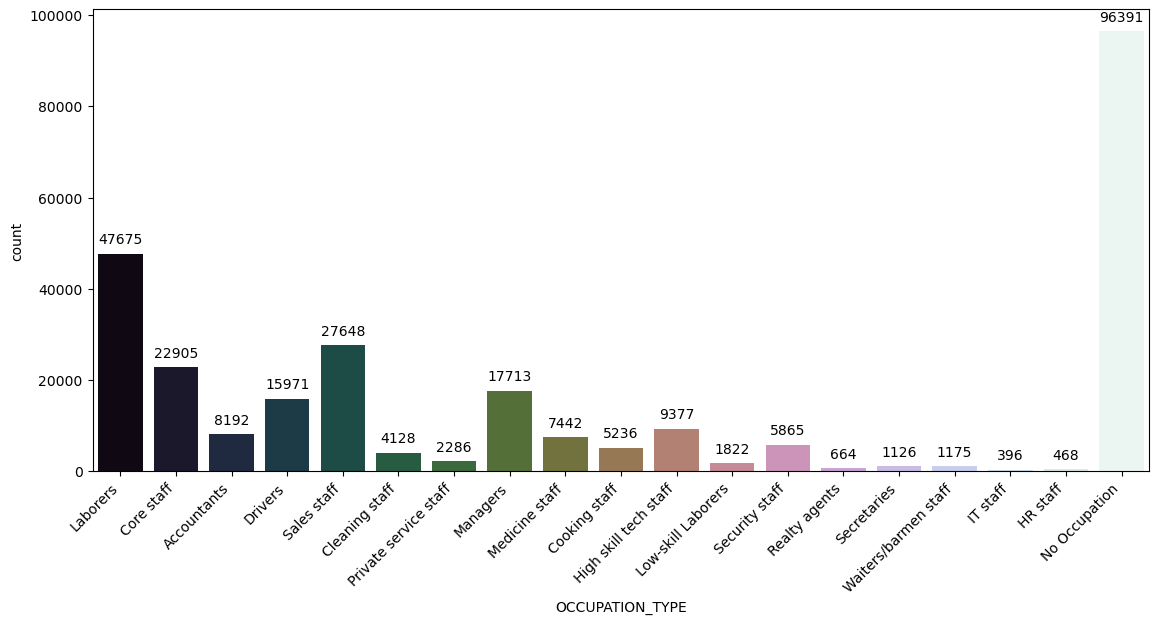

In [29]:
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='OCCUPATION_TYPE', data=app_df, hue='OCCUPATION_TYPE', legend=False, palette='cubehelix')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.xticks(rotation=45, ha='right')

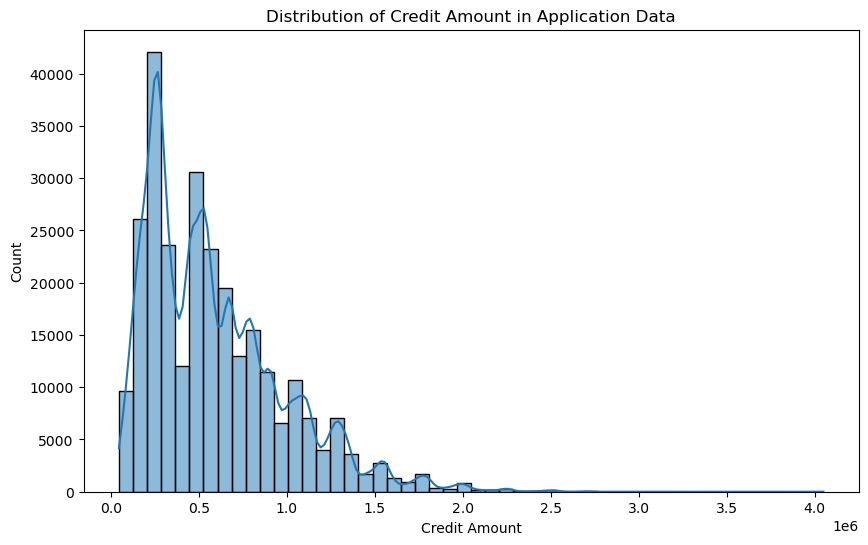

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(app_df['AMT_CREDIT'], bins=50, kde=True,)
plt.title('Distribution of Credit Amount in Application Data')
plt.xlabel('Credit Amount')
plt.show()

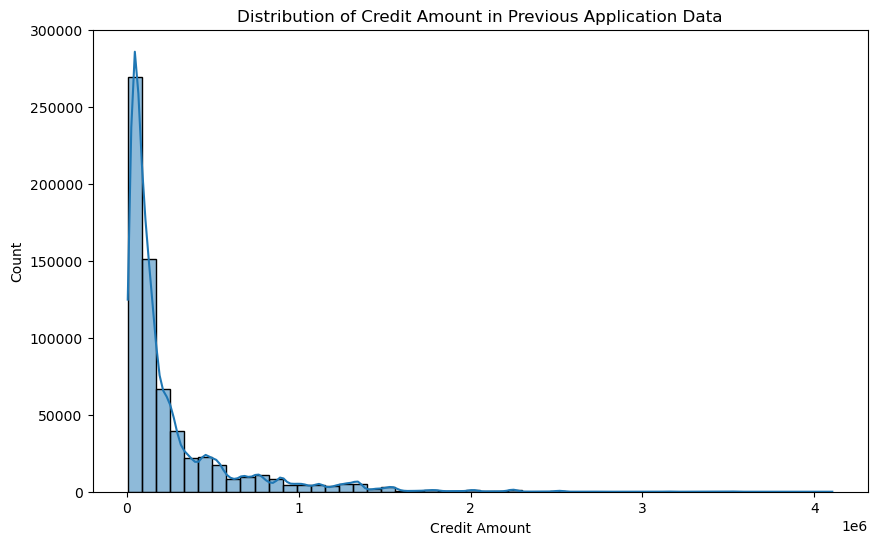

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(prev_df['AMT_CREDIT'], bins=50, kde=True,)
plt.title('Distribution of Credit Amount in Previous Application Data')
plt.xlabel('Credit Amount')
plt.show()

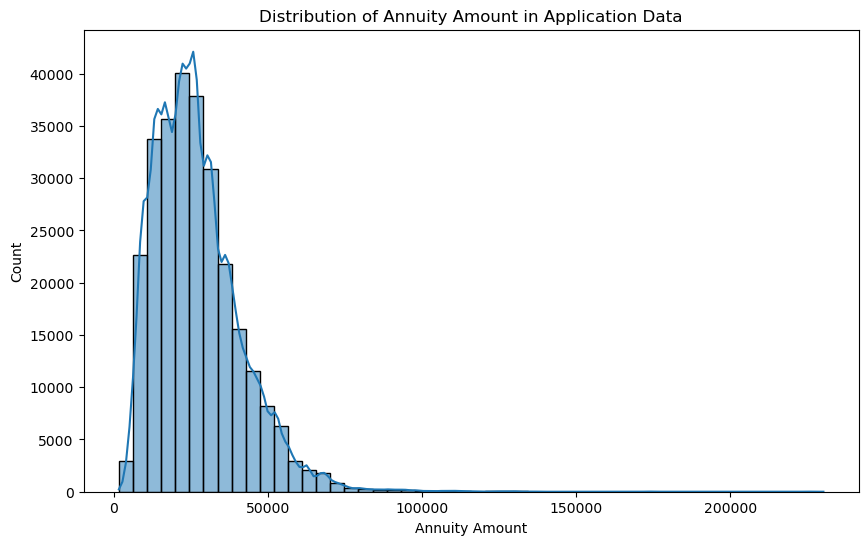

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(app_df['AMT_ANNUITY'], bins=50, kde=True,)
plt.title('Distribution of Annuity Amount in Application Data')
plt.xlabel('Annuity Amount')
plt.show()

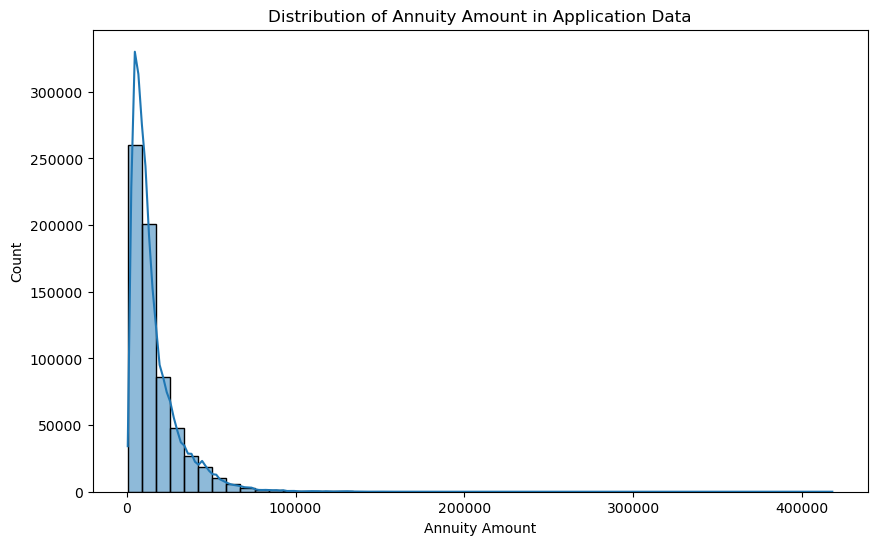

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(prev_df['AMT_ANNUITY'], bins=50, kde=True,)
plt.title('Distribution of Annuity Amount in Application Data')
plt.xlabel('Annuity Amount')
plt.show()

In [34]:
con_stat= prev_df['NAME_CONTRACT_STATUS'].value_counts()
print(con_stat)

NAME_CONTRACT_STATUS
Approved        532863
Refused         125662
Canceled          5038
Unused offer       503
Name: count, dtype: int64


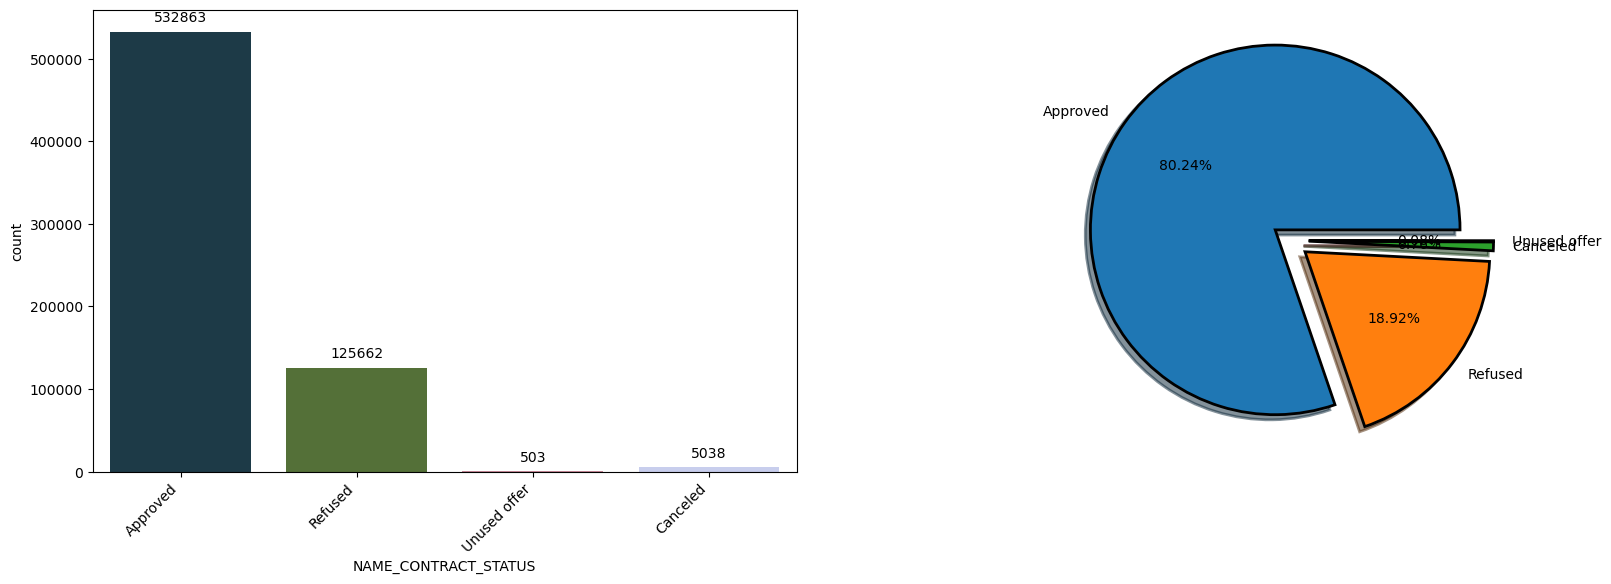

In [35]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='NAME_CONTRACT_STATUS', data=prev_df, hue='NAME_CONTRACT_STATUS', legend=False, palette='cubehelix')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
explode = (0.1,0.1,0.1,0.1)
plt.pie(prev_df['NAME_CONTRACT_STATUS'].value_counts(),labels= con_stat.index,autopct="%.2f%%", shadow=True,startangle=0,wedgeprops= wp,explode = explode)
plt.show()

## Analysis of Previous Applications Data in Respect to Application Data

In [36]:
# Merge the application data with the previous application data
merged_data = pd.merge(app_df, prev_df, on='SK_ID_CURR', how='left')

# Checking if the client had previous applications
merged_data['HAS_PREV_APPLICATION'] = merged_data['SK_ID_PREV'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Analyzing the approval status of previous applications
prev_application_status = merged_data['NAME_CONTRACT_STATUS'].value_counts()

print("Previous Application Status Counts:")
display(prev_application_status)

Previous Application Status Counts:


NAME_CONTRACT_STATUS
Approved        532863
Refused         125662
Canceled          5038
Unused offer       503
Name: count, dtype: int64

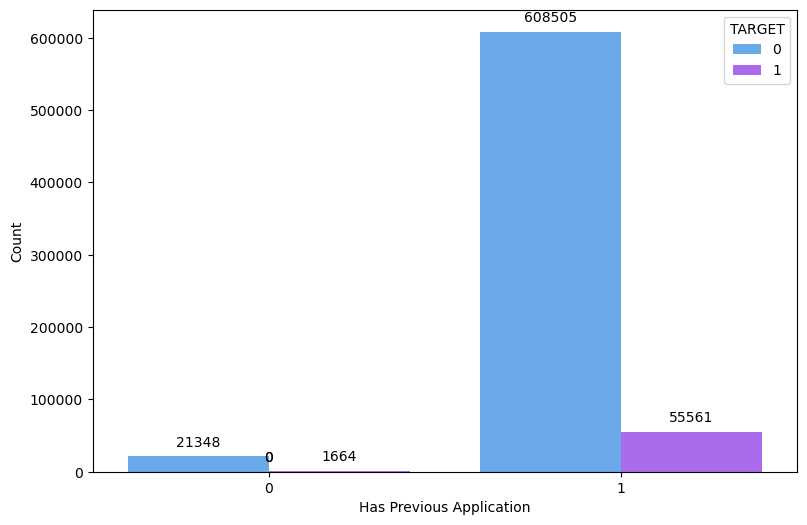

In [37]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='HAS_PREV_APPLICATION', data=merged_data, hue='TARGET', palette='cool')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.xlabel('Has Previous Application')
plt.ylabel('Count')
plt.show()

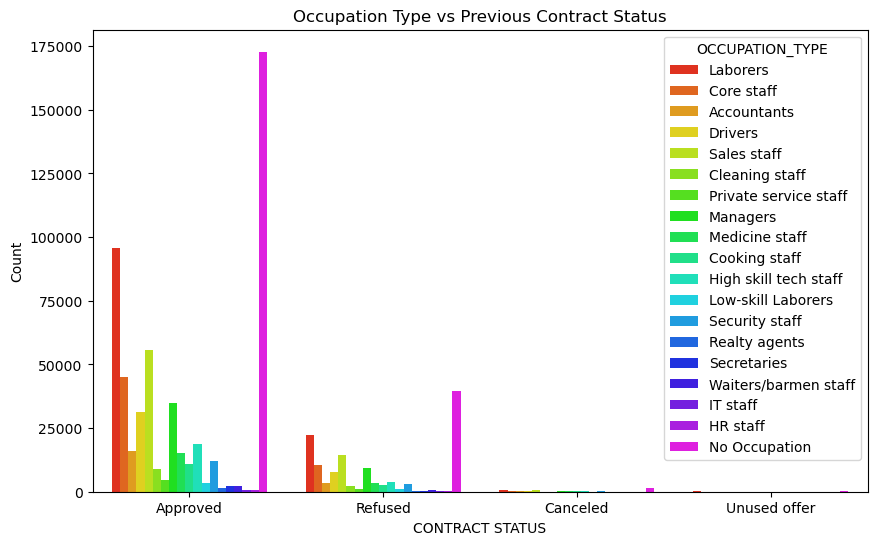

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', hue='OCCUPATION_TYPE', data=merged_data,palette='gist_rainbow')
plt.title('Occupation Type vs Previous Contract Status')
plt.xlabel('CONTRACT STATUS')
plt.ylabel('Count')
plt.show()

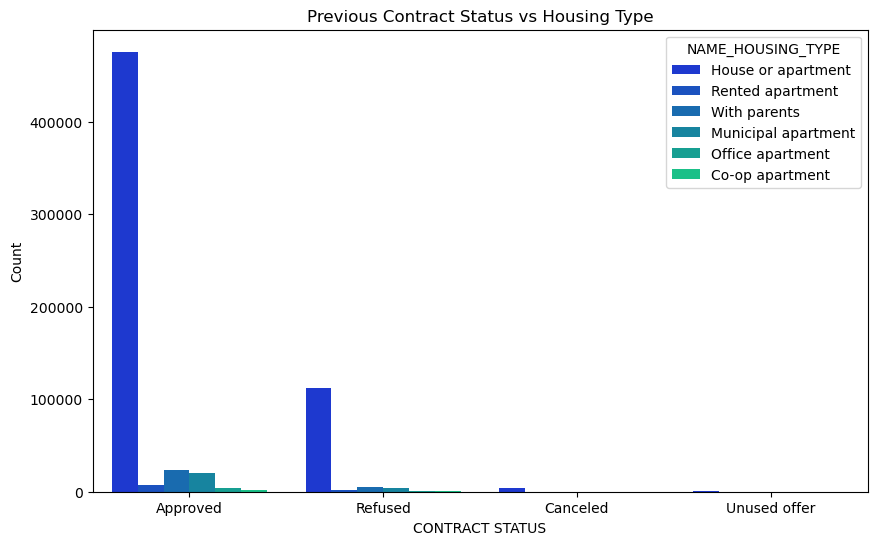

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_HOUSING_TYPE', data=merged_data,palette='winter')
plt.title('Previous Contract Status vs Housing Type')
plt.xlabel('CONTRACT STATUS')
plt.ylabel('Count')
plt.show()

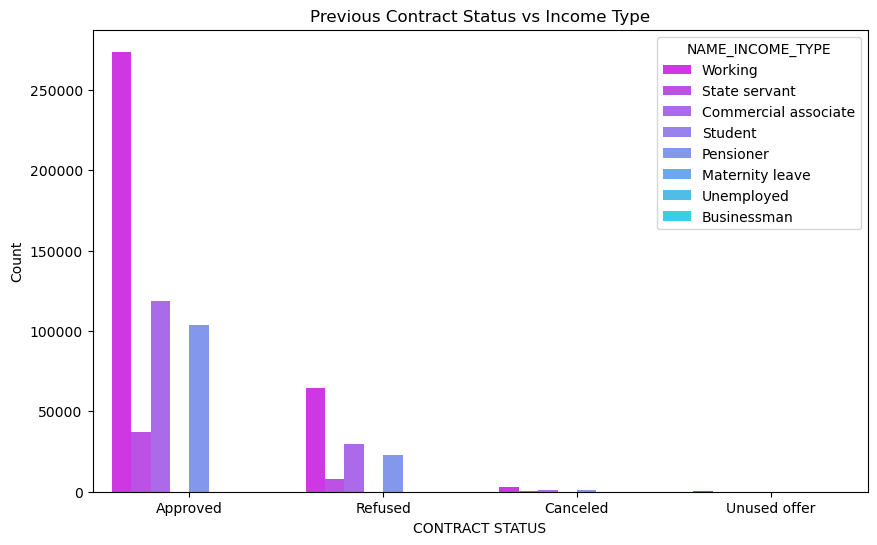

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_INCOME_TYPE', data=merged_data,palette='cool_r')
plt.title('Previous Contract Status vs Income Type')
plt.xlabel('CONTRACT STATUS')
plt.ylabel('Count')
plt.show()

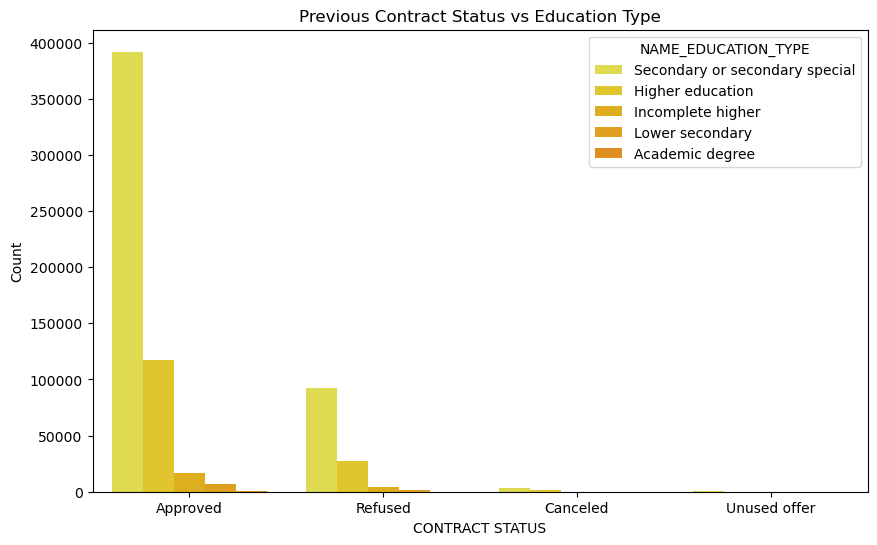

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_EDUCATION_TYPE', data=merged_data,palette='Wistia')
plt.title('Previous Contract Status vs Education Type')
plt.xlabel('CONTRACT STATUS')
plt.ylabel('Count')
plt.show()

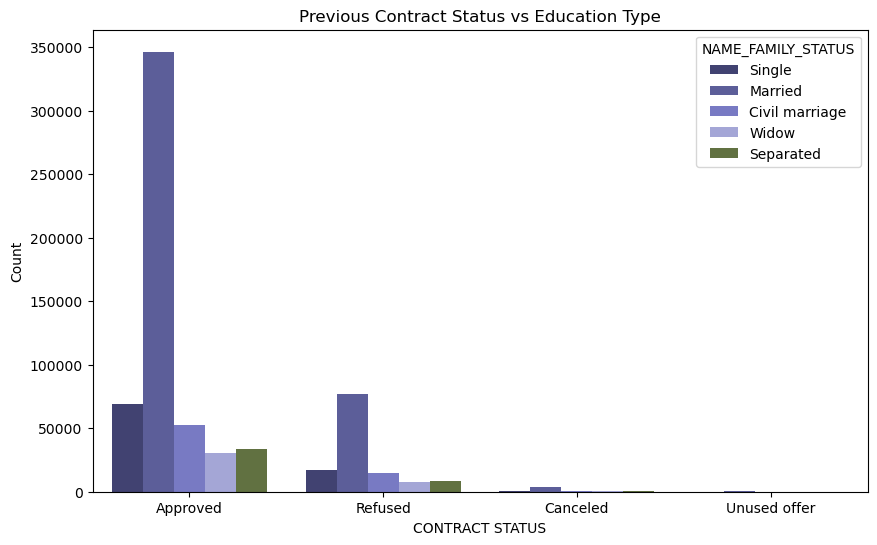

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_FAMILY_STATUS', data=merged_data,palette='tab20b')
plt.title('Previous Contract Status vs Education Type')
plt.xlabel('CONTRACT STATUS')
plt.ylabel('Count')
plt.show()

In [43]:
app_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,276480.0,278230.126595,102810.910324,100002.0,189221.75,278337.5,367214.25,456255.0
TARGET,276480.0,0.080704,0.272380,0.0,0.00,0.0,0.00,1.0
AMT_INCOME_TOTAL,276480.0,167312.715299,245504.884956,25650.0,112500.00,144000.0,202500.00,117000000.0
AMT_CREDIT,276480.0,592378.761549,393803.008467,45000.0,270000.00,509400.0,808650.00,4050000.0
AMT_ANNUITY,276480.0,26970.109776,14189.280097,1616.0,16551.00,24836.0,34511.00,230162.0
AMT_GOODS_PRICE,276480.0,532049.647819,360646.454244,40500.0,238500.00,450000.0,679500.00,4050000.0


In [44]:
prev_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,664066.0,1.913498e+06,534504.543534,1000001.0,1445451.5,1910115.5,2377385.5,2845379.0
SK_ID_CURR,664066.0,2.785958e+05,102834.116102,100002.0,189517.0,279184.0,367692.0,456255.0
AMT_ANNUITY,664066.0,1.592362e+04,14849.862994,580.0,6259.0,11250.0,20336.0,418058.0
AMT_APPLICATION,664066.0,2.307181e+05,317652.951457,5400.0,51795.0,112500.0,238500.0,4050000.0
AMT_CREDIT,664066.0,2.467526e+05,346078.426893,5139.0,50513.0,113571.0,269550.0,4104351.0
AMT_DOWN_PAYMENT,664066.0,4.197126e+03,16352.899508,-1.0,0.0,0.0,3938.0,2150100.0
AMT_GOODS_PRICE,664066.0,2.307421e+05,317669.742068,5400.0,51795.0,112500.0,238500.0,4050000.0


In [45]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,687078.0,2.785651e+05,102828.995239,100002.0,189488.25,279117.5,367613.0,456255.0
TARGET,687078.0,8.328749e-02,0.276316,0.0,0.00,0.0,0.0,1.0
AMT_INCOME_TOTAL,687078.0,1.716505e+05,225728.932443,25650.0,112500.00,157500.0,202500.0,117000000.0
AMT_CREDIT_x,687078.0,5.902506e+05,389770.367974,45000.0,270000.00,508496.0,808650.0,4050000.0
AMT_ANNUITY_x,687078.0,2.700731e+04,14066.568553,1616.0,16659.00,24894.0,34578.0,230162.0
AMT_GOODS_PRICE_x,687078.0,5.306227e+05,357535.757607,40500.0,238500.00,450000.0,679500.0,4050000.0
SK_ID_PREV,664066.0,1.913498e+06,534504.543534,1000001.0,1445451.50,1910115.5,2377385.5,2845379.0
AMT_ANNUITY_y,664066.0,1.592362e+04,14849.862994,580.0,6259.00,11250.0,20336.0,418058.0
AMT_APPLICATION,664066.0,2.307181e+05,317652.951457,5400.0,51795.00,112500.0,238500.0,4050000.0
AMT_CREDIT_y,664066.0,2.467526e+05,346078.426893,5139.0,50513.00,113571.0,269550.0,4104351.0


## Outliers Detection

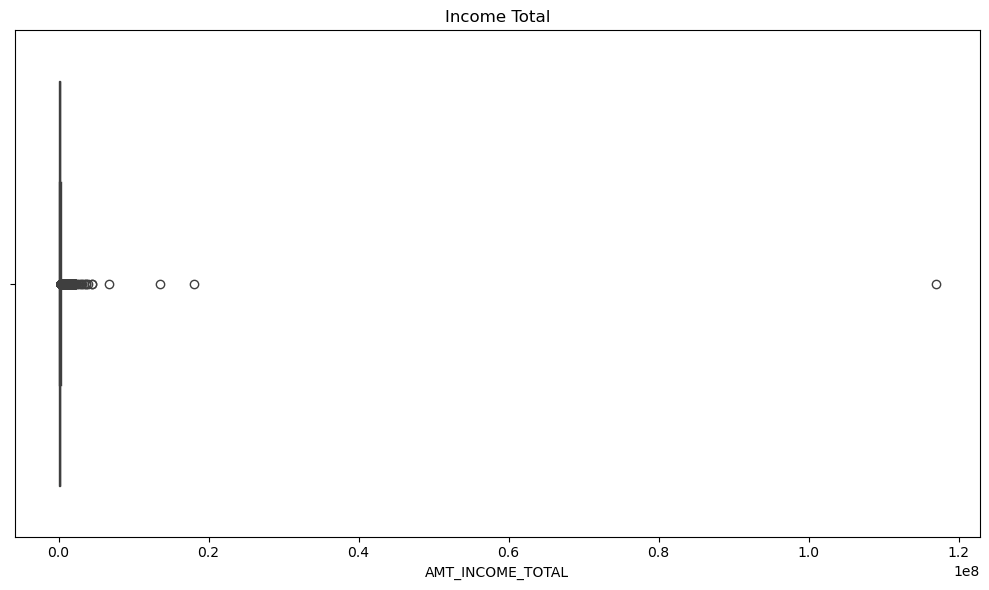

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AMT_INCOME_TOTAL',data = app_df,)
plt.title('Income Total')
plt.tight_layout()
plt.show()

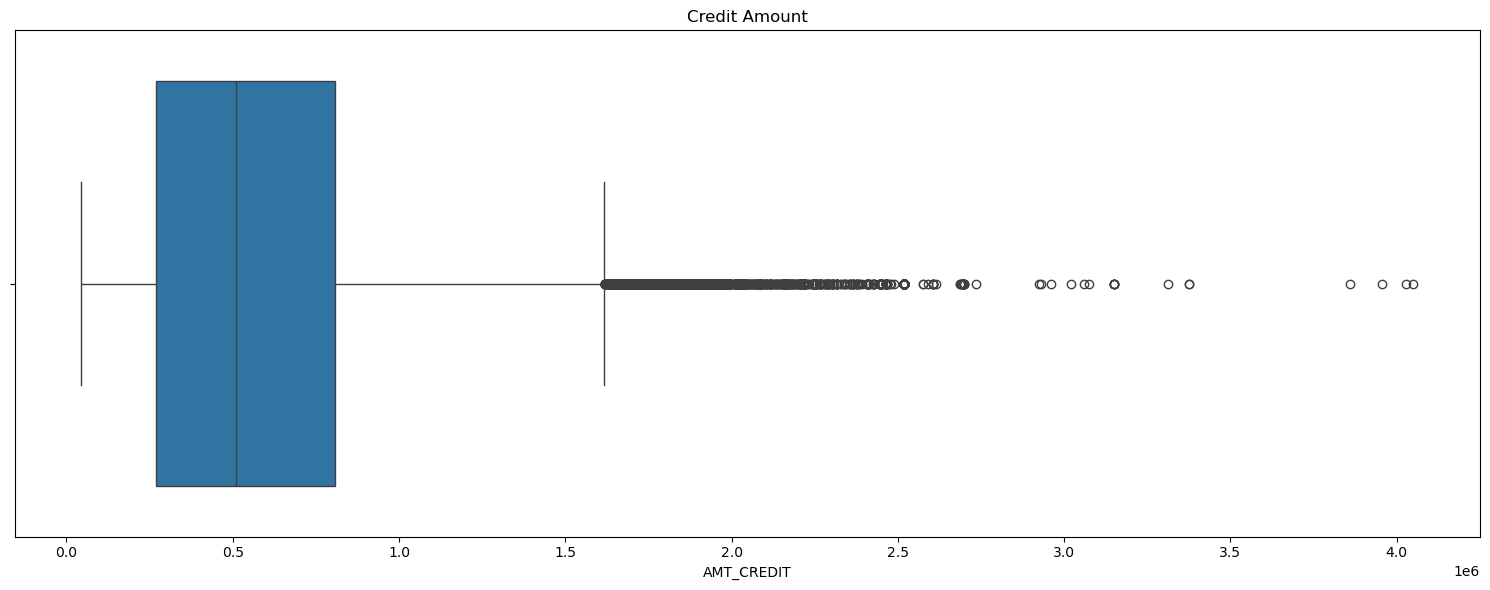

In [47]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='AMT_CREDIT',data = app_df)
plt.title('Credit Amount')
plt.tight_layout()
plt.show()

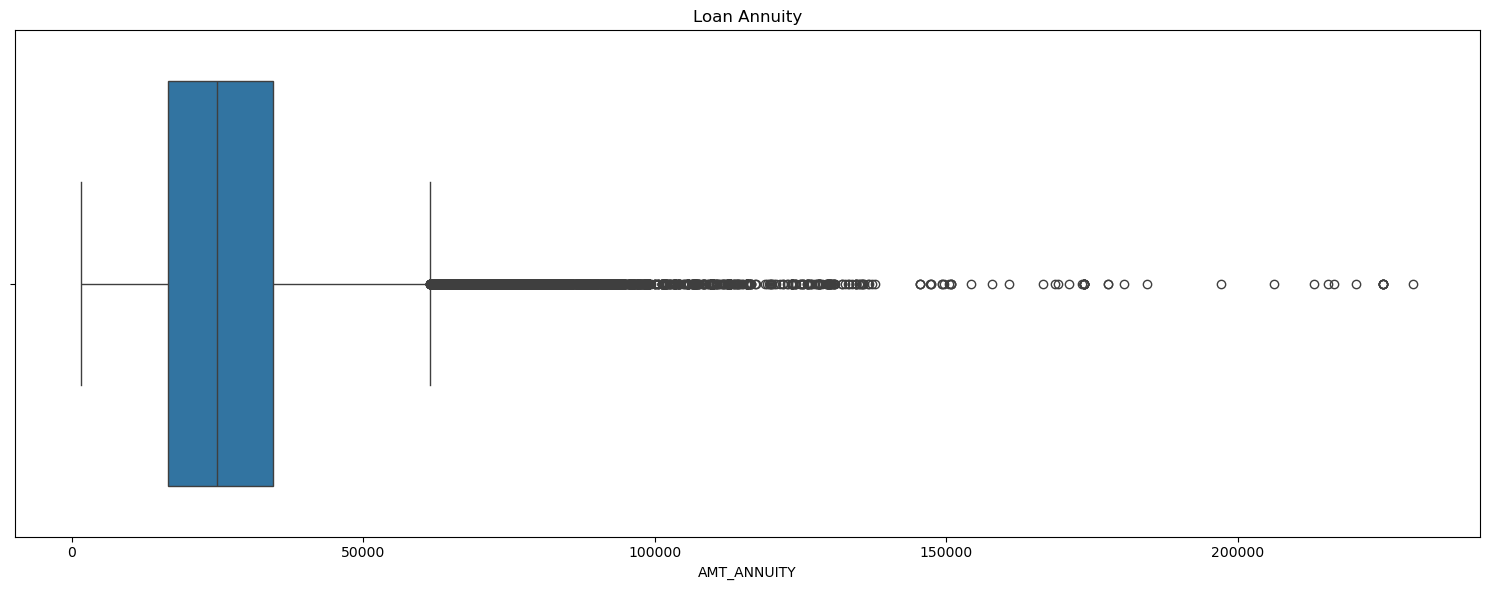

In [48]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='AMT_ANNUITY',data = app_df)
plt.title('Loan Annuity')
plt.tight_layout()
plt.show()

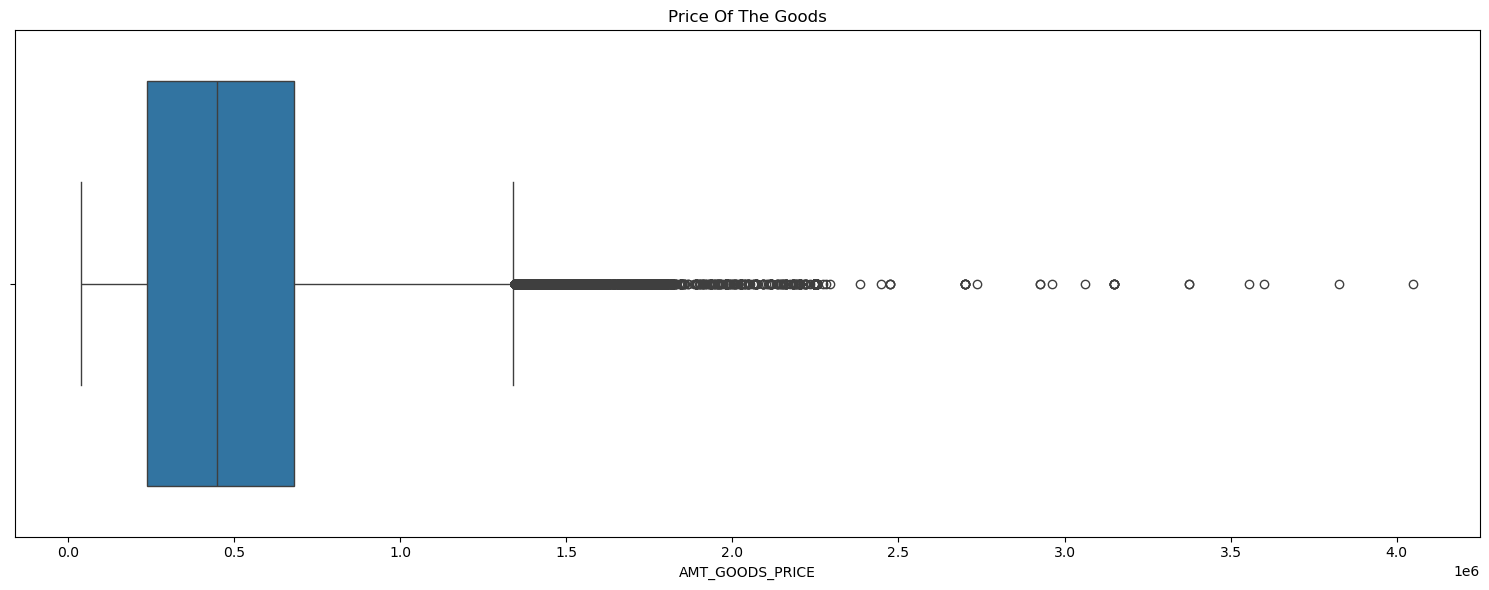

In [49]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='AMT_GOODS_PRICE',data = app_df)
plt.title('Price Of The Goods')
plt.tight_layout()
plt.show()

In [50]:
# Handling Outliers using IQR Method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for critical columns
columns_with_outliers = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
for col in columns_with_outliers:
    app_df = remove_outliers(app_df, col)


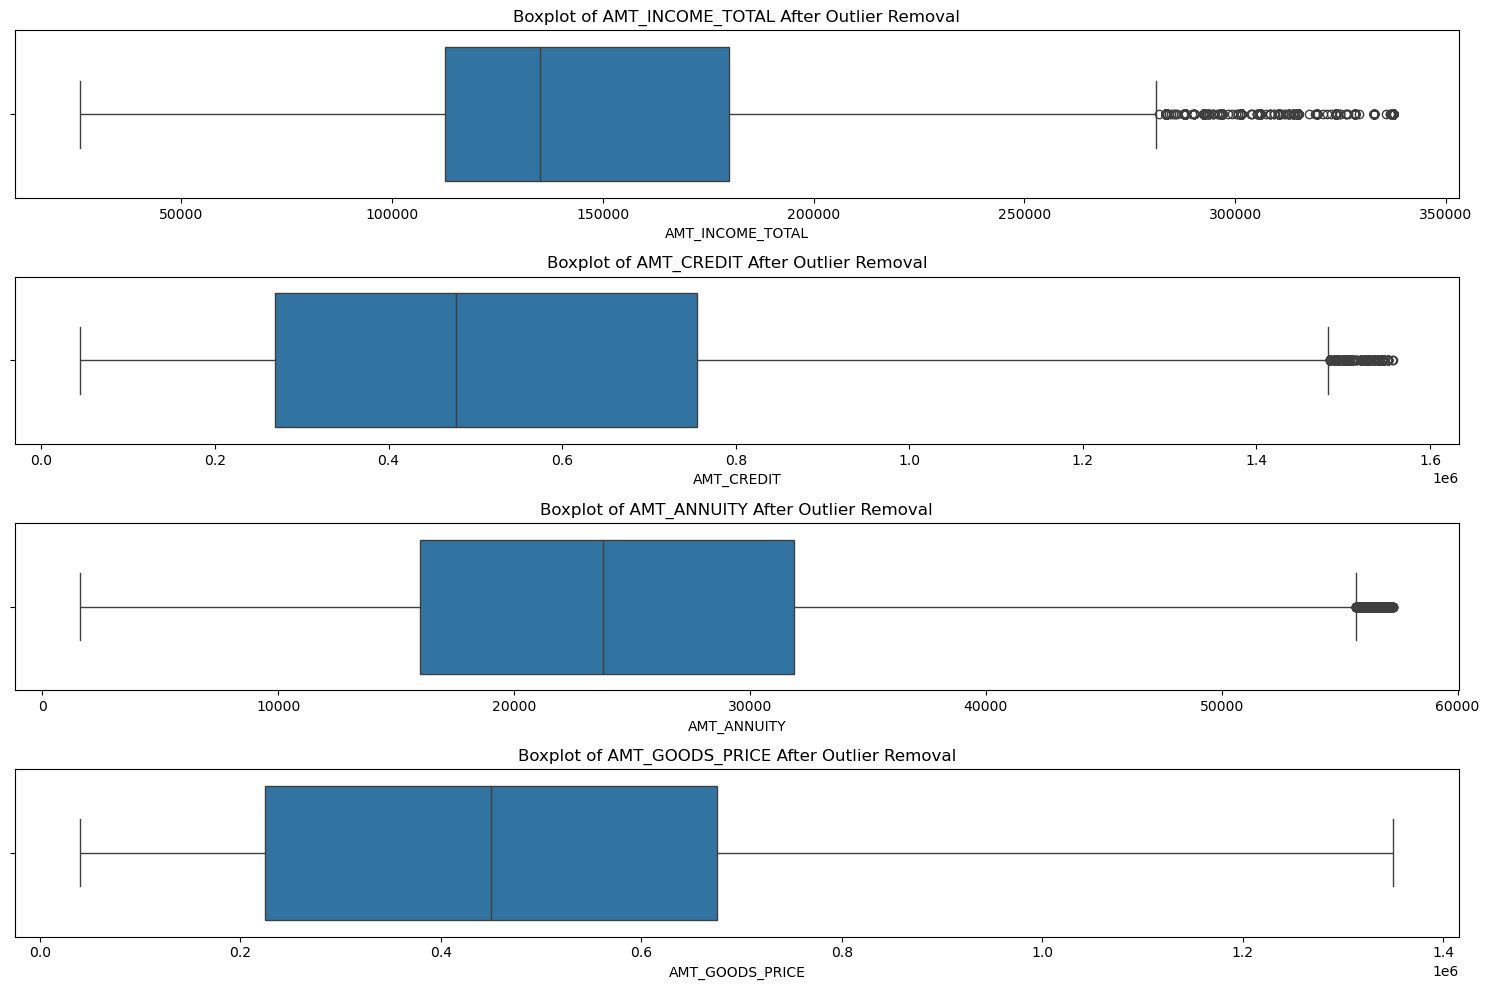

In [51]:
# Re-plot the boxplots to check if outliers have been removed

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_with_outliers):
    plt.subplot(4, 1, i+1)  # Adjust the number of subplots based on the number of columns
    sns.boxplot(x=app_df[column])
    plt.title(f'Boxplot of {column} After Outlier Removal')
plt.tight_layout()
plt.show()


## One hot encoding

In [52]:
# Identify categorical columns in both datasets
categorical_columns_app = app_df.select_dtypes(include=['object']).columns
categorical_columns_prev = prev_df.select_dtypes(include=['object']).columns

print("Categorical Columns in Application Data:")
print(categorical_columns_app)

print("\nCategorical Columns in Previous Application Data:")
print(categorical_columns_prev)

Categorical Columns in Application Data:
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')

Categorical Columns in Previous Application Data:
Index(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS'], dtype='object')


In [53]:
# Encoding categorical variables using one-hot encoding
application_data_encoded = pd.get_dummies(app_df, drop_first=True)
prev_application_data_encoded = pd.get_dummies(prev_df, drop_first=True)

print("Application Data Encoded Columns:")
print(application_data_encoded.columns)

print("\nPrevious Application Data Encoded Columns:")
print(prev_application_data_encoded.columns)

Application Data Encoded Columns:
Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_CONTRACT_TYPE_Revolving loans',
       'CODE_GENDER_M', 'CODE_GENDER_XNA',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary or secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House or apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NA

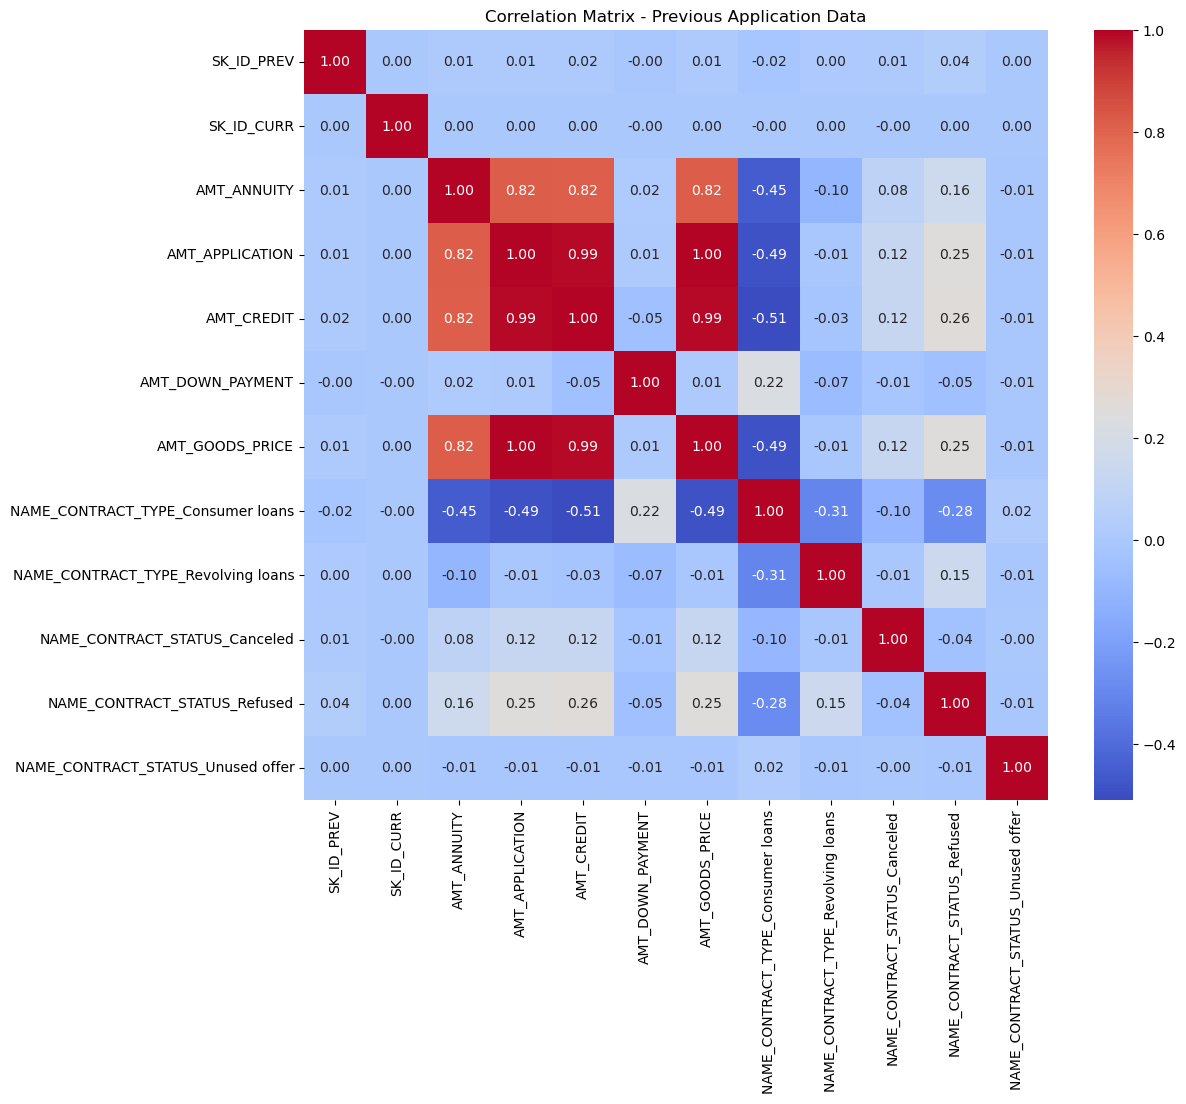

In [54]:
plt.figure(figsize=(12, 10))
corr_prev_app_data = prev_application_data_encoded.corr()
sns.heatmap(corr_prev_app_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix - Previous Application Data')
plt.show()

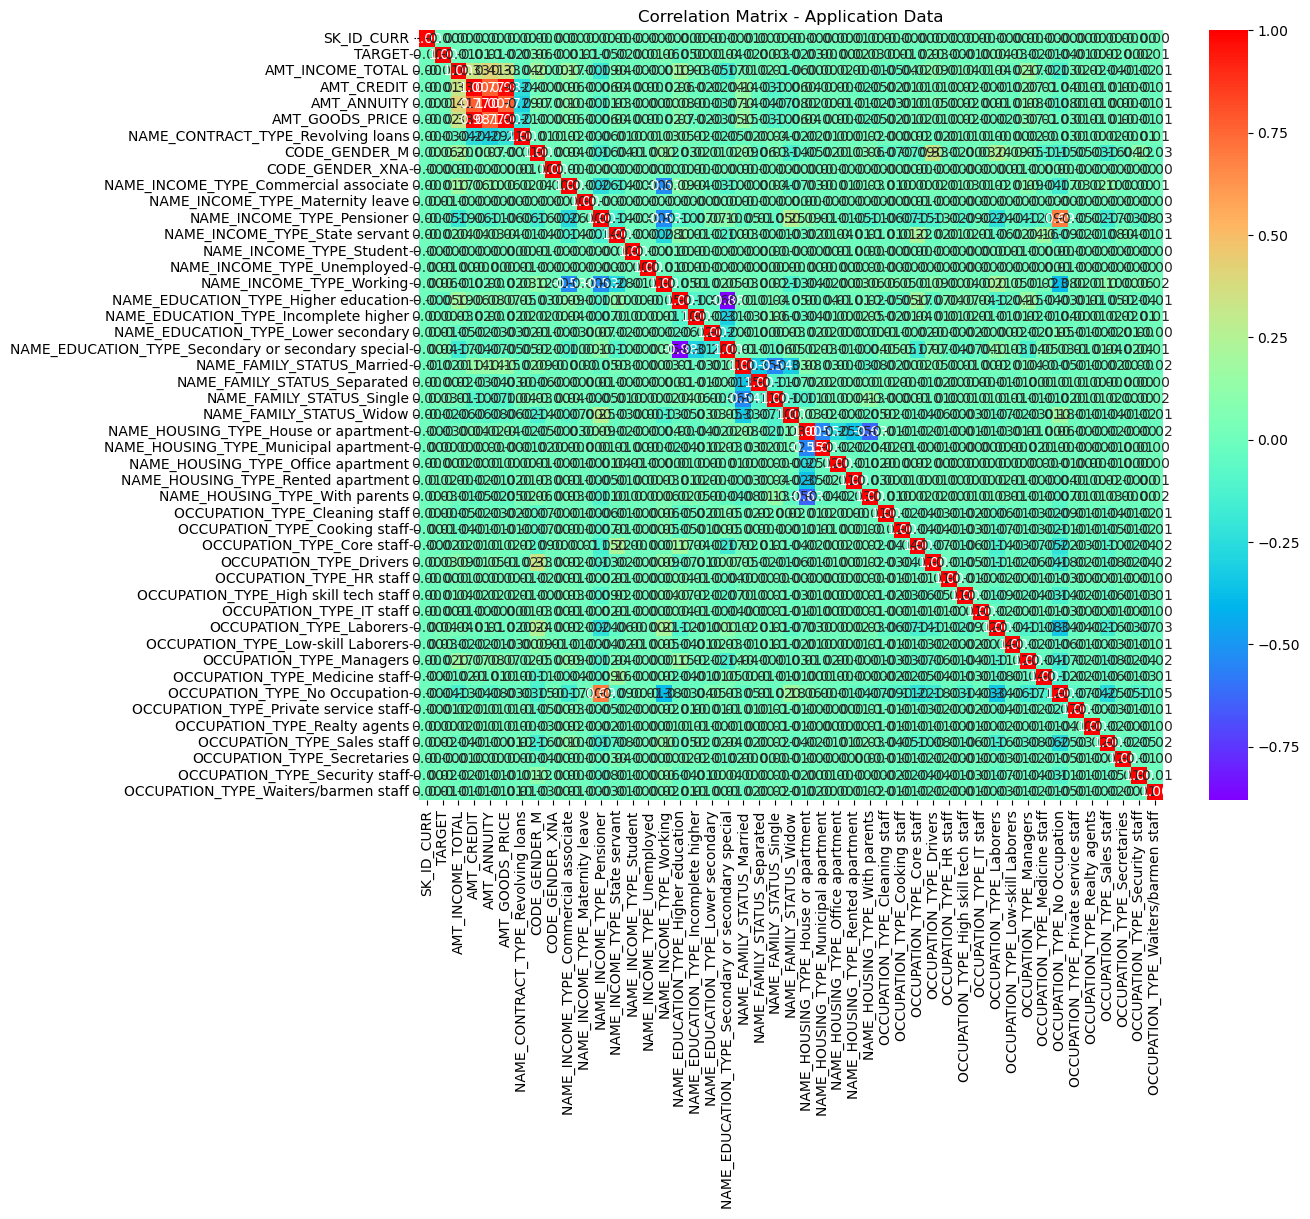

In [55]:
plt.figure(figsize=(12, 10))
corr_prev_app_data = application_data_encoded.corr()
sns.heatmap(corr_prev_app_data, annot=True, fmt=".2f", cmap='rainbow')
plt.title('Correlation Matrix - Application Data')
plt.show()

## Multivarient Analysis

In [56]:
"""### Correlation Analysis for Clients with Payment Difficulties and Other Cases
"""

# Segment the data based on the target variable
clients_with_difficulties = application_data_encoded[application_data_encoded['TARGET'] == 1]
clients_without_difficulties = application_data_encoded[application_data_encoded['TARGET'] == 0]

# Calculate correlations for each segment
correlation_difficulties = clients_with_difficulties.corr().abs()
correlation_no_difficulties = clients_without_difficulties.corr().abs()

# Extract the top 10 correlations for each segment
top_10_corr_difficulties = correlation_difficulties.unstack().sort_values(ascending=False).drop_duplicates().head(10)
top_10_corr_no_difficulties = correlation_no_difficulties.unstack().sort_values(ascending=False).drop_duplicates().head(10)

print("Top 10 Correlations for Clients with Payment Difficulties:")
display(top_10_corr_difficulties)

print("\nTop 10 Correlations for Clients without Payment Difficulties:")
display(top_10_corr_no_difficulties)


Top 10 Correlations for Clients with Payment Difficulties:


SK_ID_CURR                                          SK_ID_CURR                               1.000000
AMT_GOODS_PRICE                                     AMT_CREDIT                               0.978909
NAME_EDUCATION_TYPE_Secondary or secondary special  NAME_EDUCATION_TYPE_Higher education     0.835051
AMT_ANNUITY                                         AMT_CREDIT                               0.750295
AMT_GOODS_PRICE                                     AMT_ANNUITY                              0.745573
NAME_HOUSING_TYPE_House or apartment                NAME_HOUSING_TYPE_With parents           0.668908
OCCUPATION_TYPE_No Occupation                       NAME_INCOME_TYPE_Pensioner               0.630706
NAME_INCOME_TYPE_Working                            NAME_INCOME_TYPE_Commercial associate    0.630406
NAME_FAMILY_STATUS_Married                          NAME_FAMILY_STATUS_Single                0.567022
NAME_INCOME_TYPE_Pensioner                          NAME_INCOME_TYPE_Working      


Top 10 Correlations for Clients without Payment Difficulties:


SK_ID_CURR                             SK_ID_CURR                                            1.000000
AMT_GOODS_PRICE                        AMT_CREDIT                                            0.983062
NAME_EDUCATION_TYPE_Higher education   NAME_EDUCATION_TYPE_Secondary or secondary special    0.883344
AMT_CREDIT                             AMT_ANNUITY                                           0.772148
AMT_GOODS_PRICE                        AMT_ANNUITY                                           0.769710
NAME_INCOME_TYPE_Pensioner             OCCUPATION_TYPE_No Occupation                         0.695885
NAME_HOUSING_TYPE_House or apartment   NAME_HOUSING_TYPE_With parents                        0.628159
NAME_HOUSING_TYPE_Municipal apartment  NAME_HOUSING_TYPE_House or apartment                  0.555049
NAME_FAMILY_STATUS_Married             NAME_FAMILY_STATUS_Single                             0.539379
NAME_INCOME_TYPE_Working               NAME_INCOME_TYPE_Pensioner                 

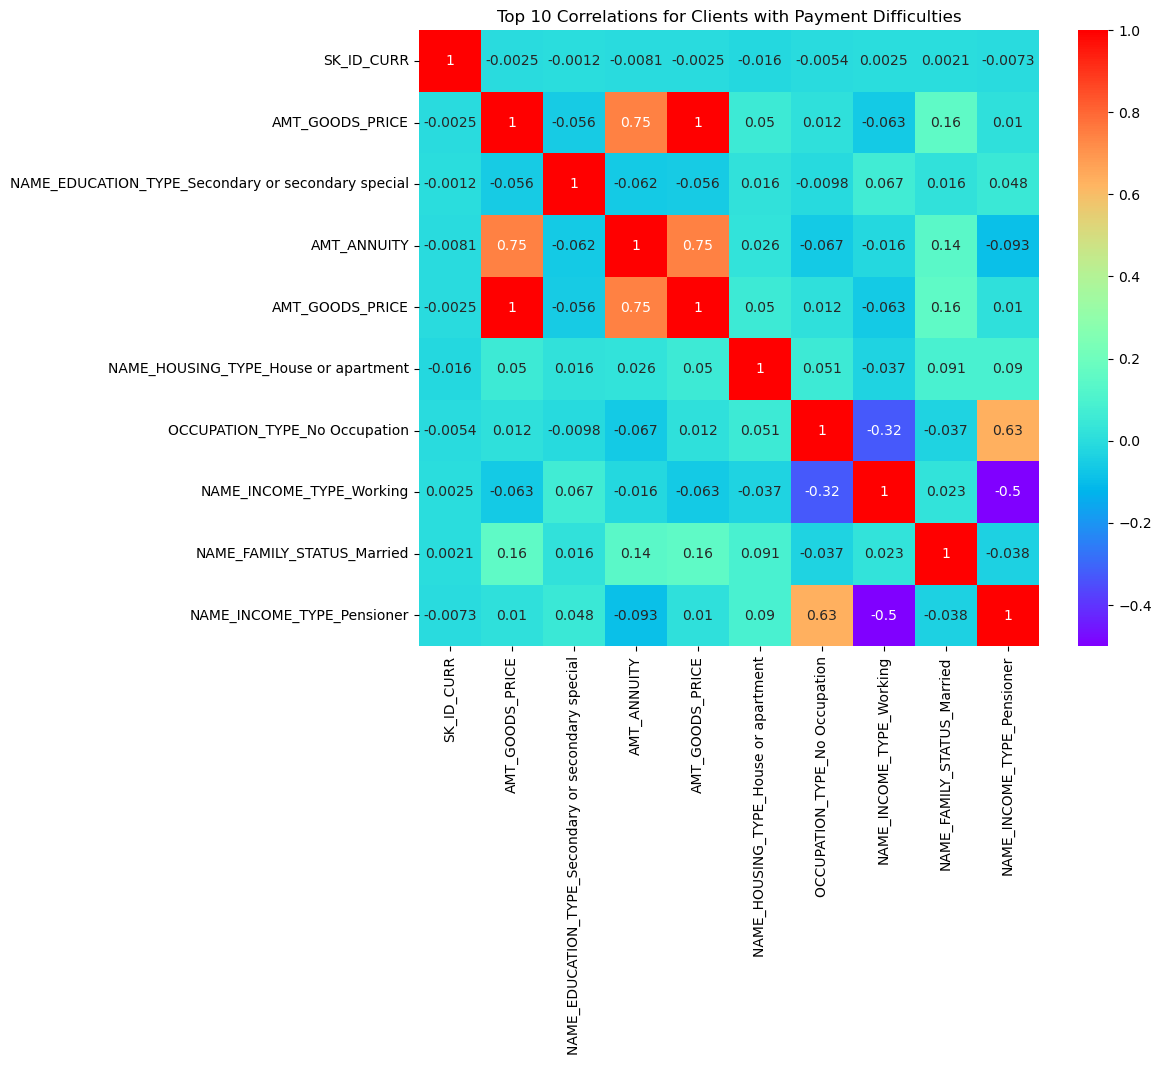

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(clients_with_difficulties[top_10_corr_difficulties.index.get_level_values(0)].corr(), annot=True, cmap='rainbow')
plt.title('Top 10 Correlations for Clients with Payment Difficulties')
plt.show()

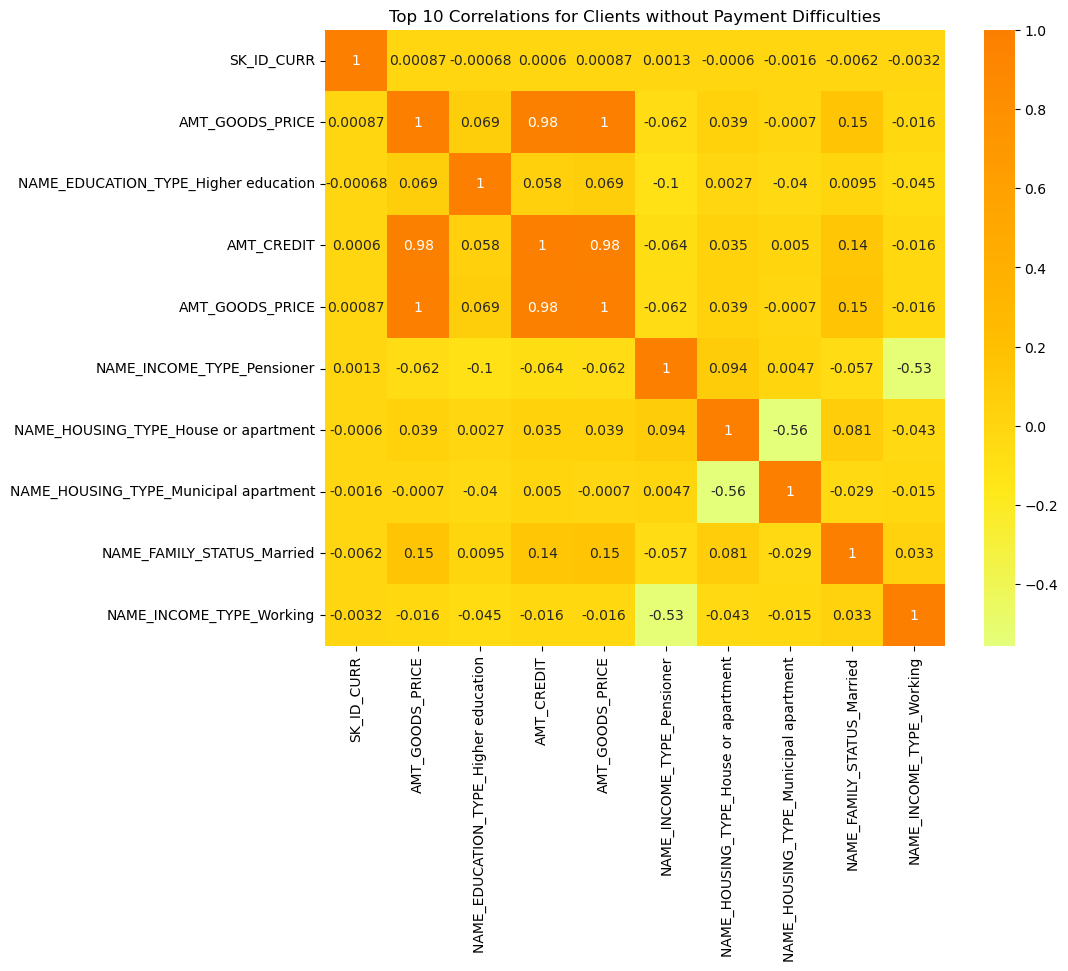

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(clients_without_difficulties[top_10_corr_no_difficulties.index.get_level_values(0)].corr(), annot=True, cmap='Wistia')
plt.title('Top 10 Correlations for Clients without Payment Difficulties')
plt.show()

In [59]:
merged_data1=pd.merge(app_df,prev_df[['SK_ID_CURR', 'AMT_DOWN_PAYMENT', 'AMT_APPLICATION','NAME_CONTRACT_STATUS']], on='SK_ID_CURR', how='left')
merged_data1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,AMT_DOWN_PAYMENT,AMT_APPLICATION,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,202500,406598,24701.0,351000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers,0.0,179055.0,Approved
1,100003,0,Cash loans,F,270000,1293503,35699.0,1129500.0,State servant,Higher education,Married,House or apartment,Core staff,0.0,900000.0,Approved
2,100003,0,Cash loans,F,270000,1293503,35699.0,1129500.0,State servant,Higher education,Married,House or apartment,Core staff,0.0,337500.0,Approved
3,100004,0,Revolving loans,M,67500,135000,6750.0,135000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers,4860.0,24282.0,Approved
4,100006,0,Cash loans,F,135000,312683,29687.0,297000.0,Working,Secondary or secondary special,Civil marriage,House or apartment,Laborers,0.0,675000.0,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630118,456244,0,Cash loans,F,261000,1303812,35982.0,1138500.0,Working,Higher education,Married,House or apartment,No Occupation,0.0,1125000.0,Approved
630119,456244,0,Cash loans,F,261000,1303812,35982.0,1138500.0,Working,Higher education,Married,House or apartment,No Occupation,0.0,900000.0,Approved
630120,456249,0,Cash loans,F,112500,225000,22050.0,225000.0,Pensioner,Secondary or secondary special,Single,House or apartment,No Occupation,0.0,114210.0,Refused
630121,456249,0,Cash loans,F,112500,225000,22050.0,225000.0,Pensioner,Secondary or secondary special,Single,House or apartment,No Occupation,0.0,180000.0,Approved


In [60]:
cor= merged_data1.corr(numeric_only=True)
cor

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_DOWN_PAYMENT,AMT_APPLICATION
SK_ID_CURR,1.000000,0.001353,0.003438,-0.001087,-0.001270,-0.000684,0.000291,0.001490
TARGET,0.001353,1.000000,-0.001985,-0.006184,0.012810,-0.016377,-0.019091,0.001765
AMT_INCOME_TOTAL,0.003438,-0.001985,1.000000,0.320169,0.399128,0.320411,0.039234,0.177820
AMT_CREDIT,-0.001087,-0.006184,0.320169,1.000000,0.767147,0.982775,0.034824,0.112236
AMT_ANNUITY,-0.001270,0.012810,0.399128,0.767147,1.000000,0.764394,0.042999,0.107704
AMT_GOODS_PRICE,-0.000684,-0.016377,0.320411,0.982775,0.764394,1.000000,0.036876,0.113103
AMT_DOWN_PAYMENT,0.000291,-0.019091,0.039234,0.034824,0.042999,0.036876,1.000000,0.005516
AMT_APPLICATION,0.001490,0.001765,0.177820,0.112236,0.107704,0.113103,0.005516,1.000000


<Axes: >

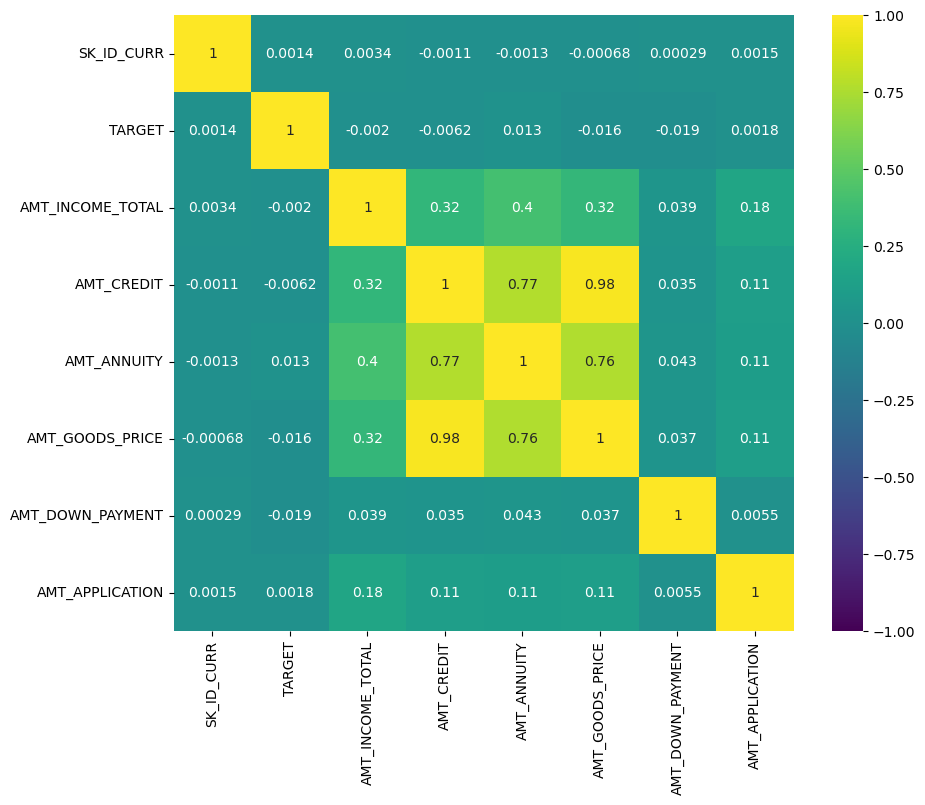

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor,annot=True, vmax=1, vmin=-1,center=0,cmap='viridis')

# Thank You